# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
file_id = '18aRJrZT6mX1g9zcvAK_rhT5_VeCyzber'
output = 'heart-disease.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('heart-disease')

Downloading...
From: https://drive.google.com/uc?id=18aRJrZT6mX1g9zcvAK_rhT5_VeCyzber
To: /content/heart-disease.zip
100%|██████████| 3.44k/3.44k [00:00<00:00, 10.1MB/s]


In [ ]:
df = pd.read_csv('heart-disease/heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Mengecek deslripsi fitur numerik

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Distribusi Target

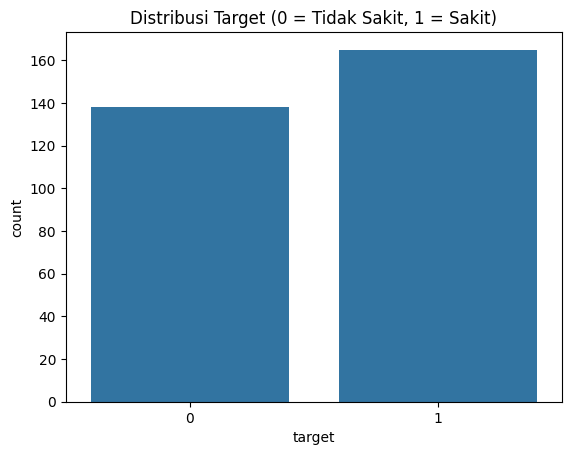

In [ ]:
sns.countplot(data=df, x='target')
plt.title('Distribusi Target (0 = Tidak Sakit, 1 = Sakit)')
plt.show()

2. Distribusi Fitur Numerik

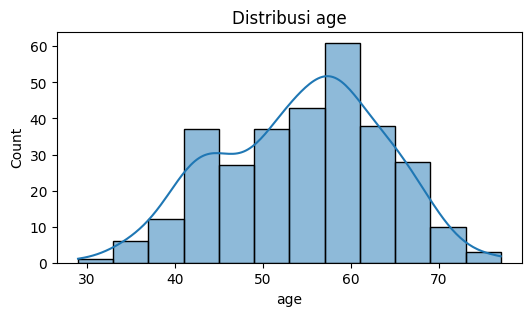

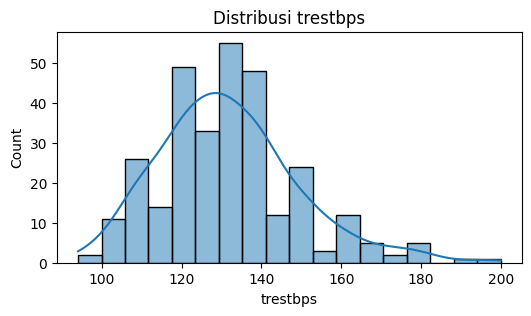

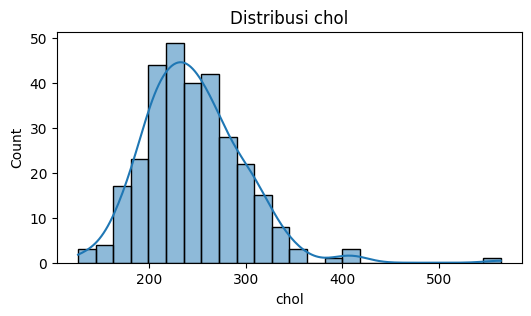

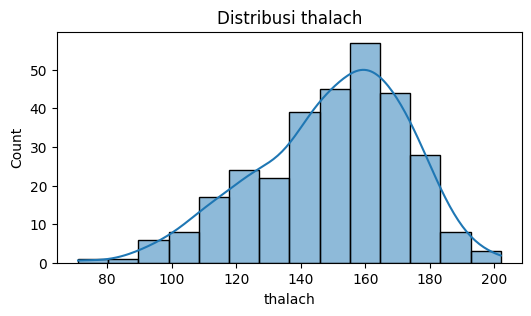

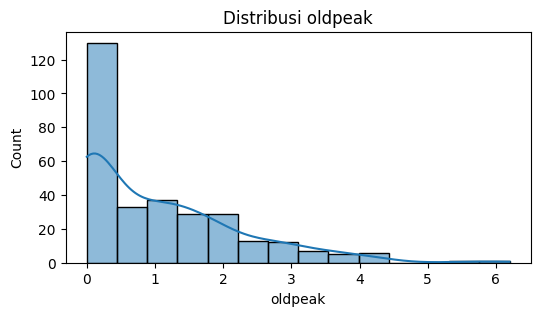

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


3. Boxplot atau histogram per fitur numerik

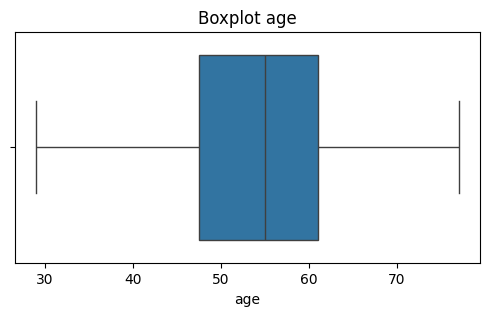

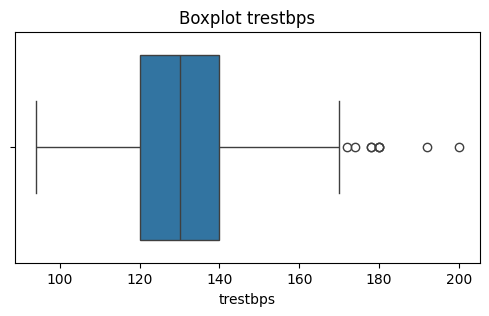

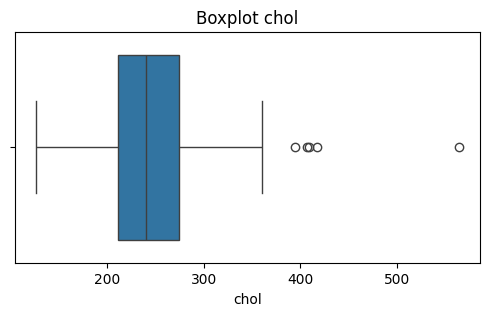

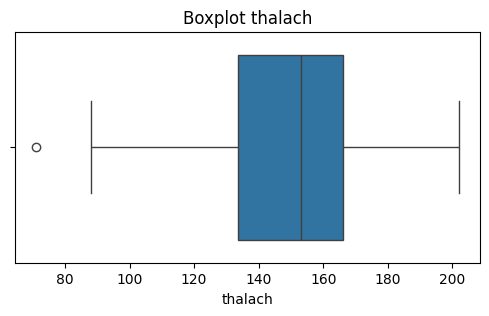

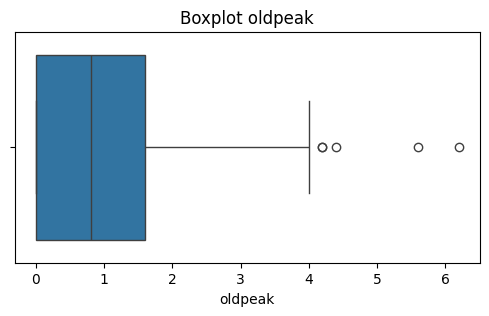

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()


4. Cek Korelasi Antar Fitur

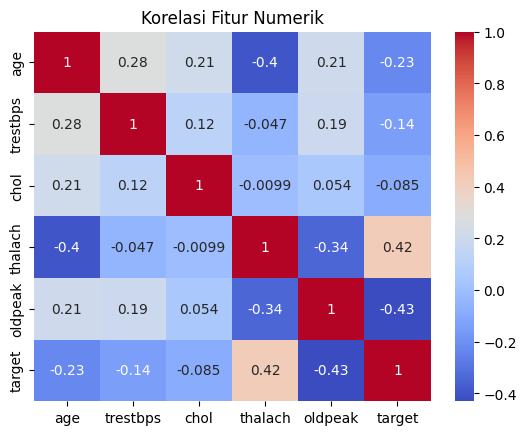

In [ ]:
sns.heatmap(df[num_cols + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()


5. Countplot per fitur kategorikal

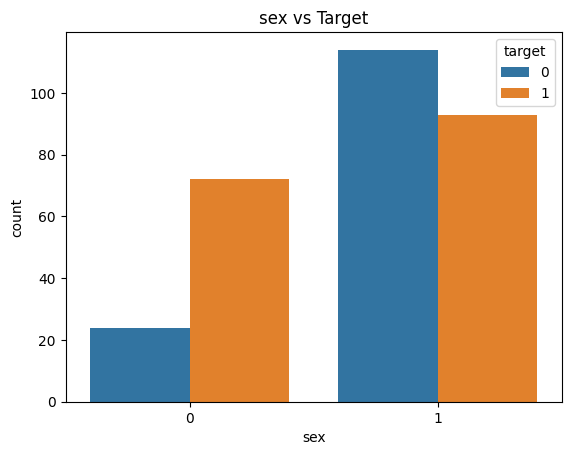

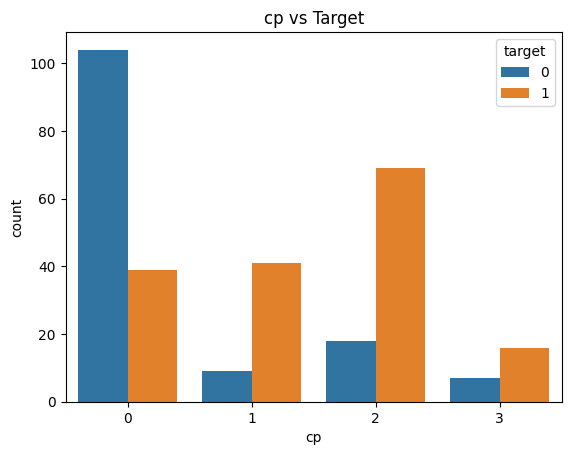

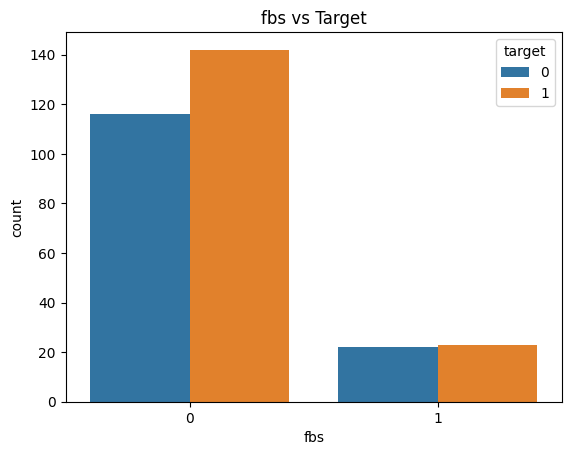

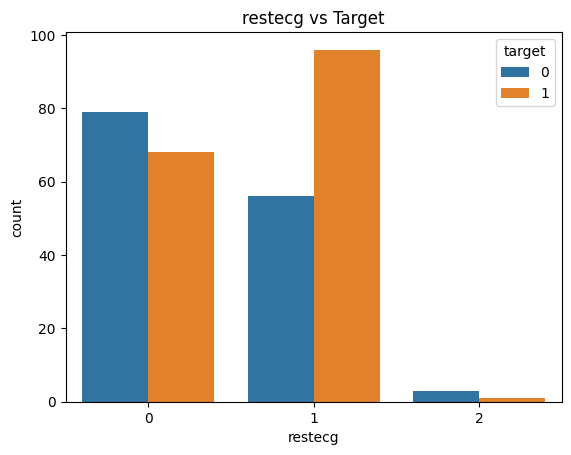

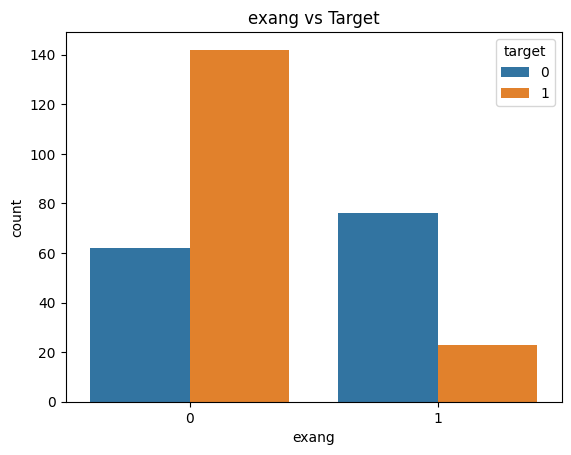

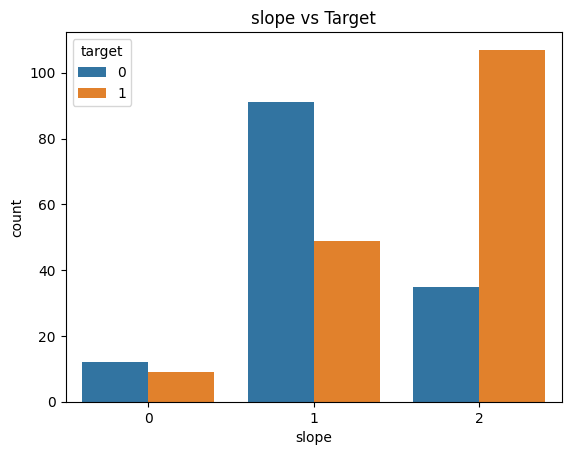

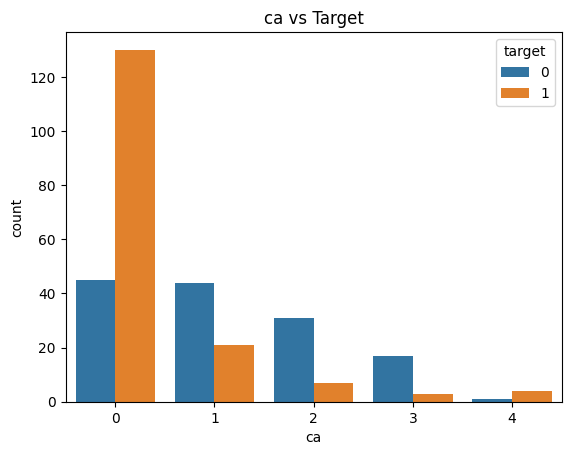

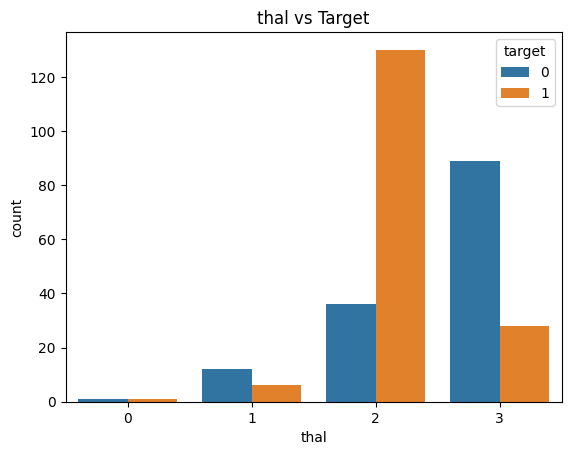

In [ ]:
for col in cat_cols:
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} vs Target')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

1. Mengecek Missing Value

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


2. Menangani outlier

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
print(outliers_iqr.sum())


age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


3. Memisahkan fitur dan target

In [ ]:
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


4. Memisahkan Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


5. Melakukan Feature Scaling

In [ ]:
X_train_to_scale = X_train[num_cols]
X_test_to_scale = X_test[num_cols]

X_train_not_scaled = X_train[cat_cols]
X_test_not_scaled = X_test[cat_cols]

# Menscaling hanya fitur numerik
scaler = StandardScaler()
X_train_scaled_part = scaler.fit_transform(X_train_to_scale)
X_test_scaled_part = scaler.transform(X_test_to_scale)

# Mengonversi hasil scaling ke DataFrame lagi
X_train_scaled_df = pd.DataFrame(X_train_scaled_part, columns=num_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled_part, columns=num_cols)

# Menggabungkan kembali dengan fitur kategori
X_train_scaled = pd.concat([X_train_scaled_df, X_train_not_scaled], axis=1)
X_test_scaled = pd.concat([X_test_scaled_df, X_test_not_scaled], axis=1)

# Mengurutkan kolom sesuai urutan semula:
X_train_scaled = X_train_scaled[X_train_to_scale.columns.tolist() + X_train_not_scaled.columns.tolist()]
X_test_scaled = X_test_scaled[X_test_to_scale.columns.tolist() + X_test_not_scaled.columns.tolist()]

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(X_train_scaled.isna().sum())
print(X_test_scaled.isna().sum())

(290, 13)
(110, 13)
age         48
trestbps    48
chol        48
thalach     48
oldpeak     48
sex         48
cp          48
fbs         48
restecg     48
exang       48
slope       48
ca          48
thal        48
dtype: int64
age         49
trestbps    49
chol        49
thalach     49
oldpeak     49
sex         49
cp          49
fbs         49
restecg     49
exang       49
slope       49
ca          49
thal        49
dtype: int64


In [ ]:
X_train_scaled

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1.610480,0.461840,-0.123235,0.039942,0.604853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.282051,1.575595,0.023366,-1.373486,-0.890458,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
2,0.077810,-0.206413,-0.835301,-0.917541,0.770998,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
3,0.296763,-1.208792,1.887302,-0.324813,1.601727,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
4,1.829433,-1.208792,0.421285,-0.917541,-0.890458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
287,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
284,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0
274,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [ ]:
X_test_scaled

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.296763,1.018718,0.651659,-1.738241,-0.392021,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.391527,-0.373476,0.190911,0.587076,-0.724313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.907478,0.461840,1.384668,-1.373486,0.604853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.625192,0.461840,-1.254163,0.222320,1.601727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.469573,0.461840,-0.248894,0.587076,-0.392021,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0
131,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
123,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0
224,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0


In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
